# Topic Modeling

## Introduction

Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

In this notebook, we will be covering the steps on how to do **Latent Dirichlet Allocation (LDA)**, which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

## Topic Modeling - Attempt #1 (All Text)

In [43]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data

,aaaaah,aaah,aah,abandoned,abc,abcs,ability,abject,able,ablebodied,...,zoo,zoom,zorb,zucker,zuckerberg,zuckerfuck,zuckerfucker,zuckermother,zuckzucker,éclair
ali,0,0,0,0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
amy,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
andrew,0,0,1,0,0,0,0,0,2,0,...,0,0,1,0,0,0,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
bo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chris,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,1,1,2,1,0
dave,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ellen,0,0,0,0,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [45]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,ali,amy,andrew,anthony,bill,bo,chris,dave,ellen,hasan,...,joe,john,louis,matt,mike,nate,ricky,sarah,sebastian,taylor
aaaaah,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaah,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
aah,0,0,1,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
abc,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [47]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [48]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.007*"man" + 0.004*"okay" + 0.004*"went" + 0.004*"life" + 0.004*"little" + 0.004*"guy" + 0.004*"did" + 0.004*"come" + 0.003*"mean" + 0.003*"way"'),
 (1,
  '0.004*"goes" + 0.004*"tell" + 0.003*"doing" + 0.003*"mean" + 0.003*"come" + 0.003*"did" + 0.003*"lot" + 0.003*"okay" + 0.003*"guys" + 0.003*"look"')]

In [49]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.007*"went" + 0.005*"little" + 0.005*"come" + 0.003*"joke" + 0.003*"did" + 0.003*"goes" + 0.003*"look" + 0.003*"guy" + 0.003*"guys" + 0.003*"way"'),
 (1,
  '0.005*"okay" + 0.005*"man" + 0.004*"goes" + 0.004*"mean" + 0.004*"did" + 0.004*"lot" + 0.004*"doing" + 0.003*"guys" + 0.003*"uh" + 0.003*"dude"'),
 (2,
  '0.006*"man" + 0.004*"life" + 0.004*"make" + 0.004*"mean" + 0.004*"guy" + 0.004*"did" + 0.003*"come" + 0.003*"love" + 0.003*"little" + 0.003*"okay"')]

In [50]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.008*"man" + 0.005*"okay" + 0.004*"life" + 0.004*"kids" + 0.004*"god" + 0.004*"dream" + 0.004*"did" + 0.004*"guys" + 0.004*"love" + 0.003*"ok"'),
 (1,
  '0.004*"little" + 0.003*"man" + 0.003*"lot" + 0.003*"sarah" + 0.003*"make" + 0.003*"nice" + 0.003*"did" + 0.003*"look" + 0.003*"shes" + 0.003*"black"'),
 (2,
  '0.006*"okay" + 0.005*"come" + 0.004*"look" + 0.004*"did" + 0.004*"doing" + 0.003*"thank" + 0.003*"uh" + 0.003*"little" + 0.003*"way" + 0.003*"gotta"'),
 (3,
  '0.005*"goes" + 0.005*"guy" + 0.005*"man" + 0.005*"went" + 0.004*"come" + 0.004*"mean" + 0.004*"did" + 0.004*"little" + 0.004*"doing" + 0.004*"guys"')]

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

## Topic Modeling - Attempt #2 (Nouns Only)

One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.). Check out the UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

In [78]:
# Let's create a function to pull out nouns from a string of text
import nltk

# This will *force* download punkt again properly
nltk.download('punkt_tab', force=True)
nltk.download('averaged_perceptron_tagger', force=True)
nltk.data.path.append(r"C:/Users/hp/AppData/Roaming/nltk_data")

from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [79]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
ali,ali wong baby cobra transcript scraps from th...
amy,amy schumer emergency contact transcript scra...
andrew,andrew santino home field advantage transcrip...
anthony,anthony jeselnik thoughts and prayers full tr...
bill,bill burr im sorry you feel that way full tra...
bo,scraps from the loft skip to content moviesmo...
chris,chris rock tamborine transcript scraps from t...
dave,dave chappelle the age of spin transcript scr...
ellen,ellen degeneres for your approval transcript ...
hasan,scraps from the loft skip to content moviesmo...


In [80]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
ali,ali baby cobra transcript scraps skip reviewsm...
amy,schumer emergency contact transcript scraps sk...
andrew,andrew santino home field advantage scraps ski...
anthony,anthony jeselnik thoughts prayers transcript s...
bill,bill sorry way transcript scraps skip reviewsm...
bo,scraps skip reviewsmovie transcriptstv seriest...
chris,chris rock tamborine transcript scraps skip re...
dave,chappelle age spin transcript scraps skip revi...
ellen,ellen degeneres approval transcript scraps ski...
hasan,scraps skip reviewsmovie transcriptstv seriest...


In [86]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names_out())
data_dtmn.index = data_nouns.index
data_dtmn

,aah,abc,abcs,ability,abortion,abortions,absolutelymelania,absolutelyyou,absurdities,abuse,...,zombies,zone,zoo,zoom,zucker,zuckerberg,zuckerfucker,zuckermother,zuckzucker,éclair
ali,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
amy,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
andrew,1,0,0,0,0,0,0,0,1,1,...,0,2,0,0,0,0,0,0,0,0
anthony,0,0,0,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
bill,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
bo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chris,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,1,1,1,0
dave,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
ellen,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [88]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.006*"joke" + 0.006*"day" + 0.005*"thing" + 0.005*"friends" + 0.005*"years" + 0.004*"cause" + 0.004*"id" + 0.004*"way" + 0.004*"gon" + 0.004*"things"'),
 (1,
  '0.011*"man" + 0.008*"thing" + 0.008*"shit" + 0.007*"hes" + 0.007*"guy" + 0.007*"day" + 0.007*"life" + 0.007*"gon" + 0.006*"cause" + 0.006*"lot"')]

In [89]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.015*"man" + 0.009*"shit" + 0.006*"kids" + 0.006*"thing" + 0.005*"house" + 0.005*"way" + 0.005*"life" + 0.005*"cause" + 0.005*"fuck" + 0.005*"lot"'),
 (1,
  '0.010*"guy" + 0.009*"hes" + 0.008*"day" + 0.008*"man" + 0.008*"thing" + 0.007*"shit" + 0.007*"cause" + 0.007*"gon" + 0.006*"theyre" + 0.006*"way"'),
 (2,
  '0.008*"thing" + 0.008*"life" + 0.007*"day" + 0.006*"joke" + 0.006*"things" + 0.006*"gon" + 0.005*"lot" + 0.005*"hes" + 0.005*"shes" + 0.005*"way"')]

In [90]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.014*"man" + 0.014*"shit" + 0.009*"life" + 0.009*"fuck" + 0.009*"thing" + 0.008*"hes" + 0.007*"gon" + 0.007*"kids" + 0.006*"lot" + 0.006*"guy"'),
 (1,
  '0.006*"friends" + 0.006*"gon" + 0.005*"lot" + 0.004*"sarah" + 0.004*"man" + 0.004*"woman" + 0.004*"shes" + 0.004*"life" + 0.003*"job" + 0.003*"hes"'),
 (2,
  '0.010*"day" + 0.010*"thing" + 0.009*"man" + 0.008*"guy" + 0.007*"hes" + 0.006*"way" + 0.006*"life" + 0.006*"cause" + 0.005*"theyre" + 0.005*"things"'),
 (3,
  '0.008*"cause" + 0.008*"fck" + 0.007*"kind" + 0.006*"house" + 0.006*"gon" + 0.006*"way" + 0.006*"man" + 0.005*"theyre" + 0.005*"things" + 0.005*"guy"')]

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [91]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [92]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
ali,ali wong baby cobra transcript scraps loft ski...
amy,amy schumer emergency contact transcript scrap...
andrew,andrew santino home field advantage transcript...
anthony,anthony jeselnik thoughts prayers full transcr...
bill,bill im sorry way full transcript scraps loft ...
bo,scraps loft skip moviesmovie reviewsmovie tran...
chris,chris rock tamborine transcript scraps loft sk...
dave,chappelle age spin transcript scraps loft skip...
ellen,ellen degeneres approval transcript scraps lof...
hasan,scraps loft skip moviesmovie reviewsmovie tran...


In [94]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names_out())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaaaah,aah,abc,abcs,ability,abject,able,ablebodied,abortion,abortions,...,zombies,zone,zoo,zoom,zucker,zuckerberg,zuckerfucker,zuckermother,zuckzucker,éclair
ali,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amy,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
andrew,0,1,0,0,0,0,2,0,0,0,...,0,2,0,0,0,0,0,0,0,0
anthony,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
bo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chris,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,1,2,1,0
dave,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
ellen,0,0,0,0,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [96]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.008*"shit" + 0.006*"okay" + 0.005*"fuck" + 0.004*"white" + 0.004*"kid" + 0.003*"dude" + 0.003*"joke" + 0.003*"black" + 0.003*"car" + 0.003*"dream"'),
 (1,
  '0.007*"shit" + 0.005*"fuck" + 0.004*"kid" + 0.004*"fucking" + 0.003*"men" + 0.003*"black" + 0.003*"na" + 0.003*"uh" + 0.003*"lets" + 0.002*"everybody"')]

In [97]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.006*"dream" + 0.005*"okay" + 0.005*"shit" + 0.004*"point" + 0.004*"dude" + 0.004*"uh" + 0.004*"friend" + 0.003*"dreams" + 0.003*"work" + 0.003*"jenny"'),
 (1,
  '0.007*"joke" + 0.005*"fuck" + 0.004*"okay" + 0.004*"fucking" + 0.004*"jokes" + 0.004*"sarah" + 0.003*"baby" + 0.003*"hell" + 0.003*"uh" + 0.003*"youve"'),
 (2,
  '0.012*"shit" + 0.006*"fuck" + 0.005*"kid" + 0.005*"black" + 0.005*"white" + 0.005*"dude" + 0.004*"everybody" + 0.003*"okay" + 0.003*"fucking" + 0.003*"parents"')]

In [98]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.007*"shit" + 0.006*"fuck" + 0.006*"ahah" + 0.005*"black" + 0.005*"okay" + 0.004*"gay" + 0.003*"car" + 0.003*"mean" + 0.003*"ellen" + 0.003*"uh"'),
 (1,
  '0.005*"kid" + 0.005*"shit" + 0.004*"baby" + 0.004*"joke" + 0.004*"parents" + 0.004*"okay" + 0.003*"mom" + 0.003*"fuck" + 0.003*"na" + 0.003*"single"'),
 (2,
  '0.005*"dream" + 0.005*"okay" + 0.005*"point" + 0.004*"uh" + 0.004*"parents" + 0.004*"dude" + 0.004*"phone" + 0.004*"dreams" + 0.003*"jenny" + 0.003*"youve"'),
 (3,
  '0.014*"shit" + 0.007*"fuck" + 0.006*"white" + 0.005*"dude" + 0.005*"black" + 0.004*"kid" + 0.004*"fucking" + 0.004*"everybody" + 0.004*"fck" + 0.004*"ok"')]

## Identify Topics in Each Document

Out of the 9 topic models we looked at, the nouns and adjectives, 4 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine-tuned topics.

In [119]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.005*"kid" + 0.005*"parents" + 0.003*"course" + 0.003*"joke" + 0.003*"lets" + 0.003*"mom" + 0.003*"clinton" + 0.003*"wife" + 0.003*"shit" + 0.003*"nuts"'),
 (1,
  '0.015*"shit" + 0.009*"fuck" + 0.006*"white" + 0.006*"black" + 0.005*"fucking" + 0.005*"kid" + 0.005*"dude" + 0.004*"everybody" + 0.004*"men" + 0.004*"okay"'),
 (2,
  '0.006*"point" + 0.005*"car" + 0.005*"jenny" + 0.004*"mean" + 0.004*"ellen" + 0.003*"uh" + 0.003*"phone" + 0.003*"accident" + 0.003*"okay" + 0.003*"business"'),
 (3,
  '0.008*"okay" + 0.006*"dream" + 0.004*"sarah" + 0.003*"sex" + 0.003*"friend" + 0.003*"dreams" + 0.003*"uh" + 0.003*"single" + 0.003*"fuck" + 0.003*"dick"')]

These four topics look pretty decent. Let's settle on these for now.
* Topic 0: kid, parents
* Topic 1: white, black
* Topic 2: car, phone
* Topic 3: dream, friend

In [104]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip(corpus_transformed, data_dtmna.index))

[([(3, 0.99944264)], 'ali'),
 ([(0, 0.9990743)], 'amy'),
 ([(3, 0.99960685)], 'andrew'),
 ([(1, 0.9993408)], 'anthony'),
 ([(3, 0.999595)], 'bill'),
 ([(0, 0.04171943), (1, 0.042215813), (2, 0.8741276), (3, 0.041937172)], 'bo'),
 ([(3, 0.9994078)], 'chris'),
 ([(0, 0.99954)], 'dave'),
 ([(0, 0.9994454)], 'ellen'),
 ([(0, 0.041719425), (1, 0.04221468), (2, 0.87412876), (3, 0.04193717)],
  'hasan'),
 ([(1, 0.9995695)], 'jim'),
 ([(2, 0.9995279)], 'jimmy'),
 ([(3, 0.99957585)], 'joe'),
 ([(1, 0.9995448)], 'john'),
 ([(1, 0.99937636)], 'louis'),
 ([(2, 0.99947226)], 'matt'),
 ([(2, 0.999575)], 'mike'),
 ([(2, 0.999495)], 'nate'),
 ([(3, 0.99960935)], 'ricky'),
 ([(3, 0.9994921)], 'sarah'),
 ([(1, 0.9994645)], 'sebastian'),
 ([(1, 0.9996261)], 'taylor')]

For a first pass of LDA, these kind of make sense to me, so we'll call it a day for now.
* Topic 0: kid, parents [Amy, Dave, Ellen, Bo, Hasan]
* Topic 1: white, black [Anthony, Jim, John, Louis, Sebastian, Taylor]
* Topic 2: car, phone [Jimmy, Matt, Mike, Nate]
* Topic 3: dream, friend [Ali, Andrew, Bill, Chris, Joe, Ricky, Sarah]

### Assignment:
1. Try further modifying the parameters of the topic models above and see if you can get better topics.
2. Create a new topic model that includes terms from a different [part of speech](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and see if you can get better topics.

In [105]:
# Improved LDA model with different hyperparameters
ldana_improved = models.LdaModel(
    corpus=corpusna,
    num_topics=6,  # Try more topics
    id2word=id2wordna,
    passes=100,
    alpha='auto',
    eta='auto',
    random_state=42
)

# Print the top terms in each topic
for idx, topic in ldana_improved.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.006*"joke" + 0.005*"kid" + 0.004*"okay" + 0.004*"hell" + 0.004*"jokes" + 0.003*"parents" + 0.003*"course" + 0.003*"sarah" + 0.003*"shit" + 0.003*"fuck"
Topic 1: 0.000*"shit" + 0.000*"fucking" + 0.000*"okay" + 0.000*"fuck" + 0.000*"men" + 0.000*"white" + 0.000*"parents" + 0.000*"kid" + 0.000*"black" + 0.000*"uh"
Topic 2: 0.011*"shit" + 0.010*"fuck" + 0.007*"black" + 0.006*"fucking" + 0.006*"dream" + 0.005*"okay" + 0.005*"white" + 0.004*"uh" + 0.004*"ahah" + 0.004*"men"
Topic 3: 0.009*"jenny" + 0.008*"point" + 0.005*"car" + 0.005*"accident" + 0.004*"scrambler" + 0.004*"phone" + 0.004*"friend" + 0.004*"uh" + 0.003*"andy" + 0.003*"argument"
Topic 4: 0.017*"shit" + 0.009*"dude" + 0.007*"white" + 0.007*"fuck" + 0.006*"kid" + 0.006*"fck" + 0.005*"everybody" + 0.004*"black" + 0.004*"okay" + 0.004*"fucking"
Topic 5: 0.006*"parents" + 0.005*"mom" + 0.005*"friend" + 0.005*"clinton" + 0.004*"single" + 0.004*"kid" + 0.004*"cow" + 0.004*"okay" + 0.003*"wife" + 0.003*"shit"


Iteration 1: Log-Likelihood = -8.486586127660642
Iteration 2: Log-Likelihood = -8.55392483299272
Iteration 3: Log-Likelihood = -8.612747949575924
Iteration 4: Log-Likelihood = -8.663387284909248
Iteration 5: Log-Likelihood = -8.707537194387973
Iteration 6: Log-Likelihood = -8.746279272873638
Iteration 7: Log-Likelihood = -8.780519045237888
Iteration 8: Log-Likelihood = -8.811422719789066
Iteration 9: Log-Likelihood = -8.840008456633573
Iteration 10: Log-Likelihood = -8.86589246321601
Iteration 11: Log-Likelihood = -8.890350074710957
Iteration 12: Log-Likelihood = -8.912536387882184
Iteration 13: Log-Likelihood = -8.93356954485734
Iteration 14: Log-Likelihood = -8.952873351562241
Iteration 15: Log-Likelihood = -8.970966646238608
Iteration 16: Log-Likelihood = -8.988080237194481
Iteration 17: Log-Likelihood = -9.004306012464284
Iteration 18: Log-Likelihood = -9.019847682929447
Iteration 19: Log-Likelihood = -9.035013472417356
Iteration 20: Log-Likelihood = -9.049246552939474
Iteration 21

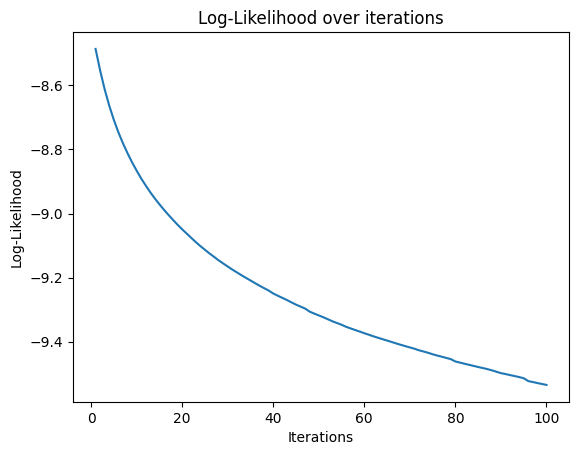

[(0,
  '0.008*"shit" + 0.007*"kid" + 0.006*"fuck" + 0.006*"fucking" + 0.005*"dude" + 0.005*"parents" + 0.005*"hell" + 0.004*"uh" + 0.004*"phone" + 0.004*"stuff"'),
 (1,
  '0.012*"shit" + 0.007*"fuck" + 0.006*"black" + 0.005*"white" + 0.005*"joke" + 0.005*"kid" + 0.004*"dick" + 0.004*"okay" + 0.004*"fucking" + 0.003*"fck"'),
 (2,
  '0.010*"okay" + 0.009*"dream" + 0.007*"shit" + 0.006*"uh" + 0.005*"husband" + 0.005*"dude" + 0.004*"friend" + 0.004*"dreams" + 0.004*"work" + 0.004*"sex"'),
 (3,
  '0.062*"link" + 0.062*"page" + 0.062*"faulty" + 0.062*"searchthis" + 0.062*"search" + 0.000*"poles" + 0.000*"police" + 0.000*"policeman" + 0.000*"policemans" + 0.000*"policy"')]

In [ ]:
from gensim.models import LdaModel
import matplotlib.pyplot as plt

# Set up a list to track log-likelihood
log_likelihoods = []

# Train LDA model with monitoring of log-likelihood
ld_extended = LdaModel(corpus=corpusna, 
                       num_topics=4, 
                       id2word=id2wordna, 
                       passes=80, 
                       iterations=100, 
                       alpha='auto', 
                       per_word_topics=True)

# Store log-likelihoods at each pass
for iteration in range(100):
    ld_extended.update(corpusna)
    log_likelihood = ld_extended.log_perplexity(corpusna)
    log_likelihoods.append(log_likelihood)
    print(f"Iteration {iteration+1}: Log-Likelihood = {log_likelihood}")

# Plot log-likelihood over iterations to detect stabilization
plt.plot(range(1, 101), log_likelihoods)
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood over iterations')
plt.show()

# Display topics after convergence
ld_extended.print_topics()

In [121]:
# Get topics with top 10 words from the improved LDA model
topics_improved = ldana_improved.print_topics(num_words=2)

# Format and print all topics
print("These six improved topics look pretty decent. Let's settle on these for now.")
for i, topic in topics_improved:
    # Cleanly format topic words (remove weights and quotes)
    words = ', '.join([word.split('*')[1].strip().strip('"') for word in topic.split('+')])
    print(f"* Topic {i}: {words}")


These six improved topics look pretty decent. Let's settle on these for now.
* Topic 0: joke, kid
* Topic 1: shit, fuck
* Topic 2: shit, fuck
* Topic 3: jenny, point
* Topic 4: shit, dude
* Topic 5: parents, mom


In [111]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import pandas as pd
from better_profanity import profanity
from sklearn.feature_extraction.text import CountVectorizer
from gensim import matutils, models
import scipy

# Load default profanity word list
profanity.load_censor_words()

# Add custom profanity words
custom_profanity_words = ['fck', 'fcking', 'okay', 'uh', 'hey', 'jamie', 'foxx', 'ngga', 'dog', 'dude', 'bro', 'heard', 'point', 'ahah']  # Replace these with your own list of words
for word in custom_profanity_words:
    profanity.add_censor_words([word])  # Adds each custom word to the profanity filter

# Function to extract relevant POS (nouns, adjectives, verbs, adverbs)
def extended_pos_terms(text):
    '''Tokenize and pull out nouns, adjectives, verbs, and adverbs.'''
    is_relevant_pos = lambda pos: pos[:2] in ['NN', 'JJ', 'VB', 'RB']
    tokenized = word_tokenize(text)
    pos_filtered = [word for (word, pos) in pos_tag(tokenized) if is_relevant_pos(pos)]
    return ' '.join(pos_filtered)

# Apply POS filtering to the transcripts
data_extended_pos = pd.DataFrame(data_clean.transcript.apply(extended_pos_terms))

# Function to remove profanity words
def remove_profanity(text):
    words = text.split()
    clean_words = [word for word in words if not profanity.contains_profanity(word)]
    return ' '.join(clean_words)

# Remove profanity from the filtered text
data_extended_pos['transcript'] = data_extended_pos['transcript'].apply(remove_profanity)

# Define stop words (use the built-in English stop words or custom list)
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Convert stop_words from frozenset to list
stop_words = list(ENGLISH_STOP_WORDS)

# Create document-term matrix
cv_extended = CountVectorizer(stop_words=stop_words, max_df=0.8)
data_cv_extended = cv_extended.fit_transform(data_extended_pos.transcript)
data_dtm_extended = pd.DataFrame(data_cv_extended.toarray(), columns=cv_extended.get_feature_names_out())
data_dtm_extended.index = data_extended_pos.index

# Gensim LDA training setup
corpus_extended = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtm_extended.transpose()))
id2word_extended = dict((v, k) for k, v in cv_extended.vocabulary_.items())

# Train LDA model
ld_extended = models.LdaModel(corpus=corpus_extended, num_topics=4, id2word=id2word_extended, passes=80)

# Display topics
ld_extended.print_topics()


[(0,
  '0.005*"joke" + 0.004*"dream" + 0.003*"jokes" + 0.003*"youve" + 0.003*"wan" + 0.003*"sleep" + 0.002*"baby" + 0.002*"single" + 0.002*"yes" + 0.002*"fun"'),
 (1,
  '0.006*"black" + 0.004*"kid" + 0.003*"white" + 0.003*"called" + 0.003*"men" + 0.003*"comes" + 0.003*"parents" + 0.003*"guns" + 0.003*"everybody" + 0.002*"son"'),
 (2,
  '0.005*"wan" + 0.005*"ok" + 0.004*"white" + 0.004*"kid" + 0.003*"everybody" + 0.003*"sarah" + 0.003*"weird" + 0.003*"sitting" + 0.003*"black" + 0.002*"die"'),
 (3,
  '0.004*"clinton" + 0.004*"jenny" + 0.004*"friend" + 0.003*"mom" + 0.003*"parents" + 0.003*"married" + 0.002*"phone" + 0.002*"car" + 0.002*"john" + 0.002*"cow"')]

In [115]:
# Get topics with top 10 words
topics_extended = ld_extended.print_topics(num_words=3)

# Format and print the topics
print("These four topics based on extended POS tagging look promising:")
for i, topic in topics_extended:
    words = ', '.join([word.split('*')[1].strip().strip('"') for word in topic.split('+')])
    print(f"* Topic {i}: {words}")

These four topics based on extended POS tagging look promising:
* Topic 0: joke, dream, jokes
* Topic 1: black, kid, white
* Topic 2: wan, ok, white
* Topic 3: clinton, jenny, friend


### FINDINGS

These four topics based on extended POS tagging look promising:
* Topic 0: joke, dream, jokes
* Topic 1: black, kid, white
* Topic 2: wan, ok, white
* Topic 3: clinton, jenny, friend

In [113]:
# Transform the corpus using the new LDA model
corpus_transformed_extended = ld_extended[corpus_extended]

# Check the first few items of corpus_transformed_extended to see topic distributions
for doc in corpus_transformed_extended[:5]:
    print(doc)  # This should print the topics and their corresponding values for each document

# Extract topics and pair them with transcript indices
topics_extended = [doc[0] for doc in corpus_transformed_extended]  # Extract the first topic for each document

# Pair the topics with transcript indices
topic_transcript_pairs_extended = list(zip(topics_extended, data_dtm_extended.index))

# Display the topic-transcript pairs
topic_transcript_pairs_extended


[(2, 0.99957955)]
[(3, 0.9993195)]
[(1, 0.99966455)]
[(0, 0.99950886)]
[(2, 0.9996862)]


[((2, 0.9995795), 'ali'),
 ((3, 0.9993195), 'amy'),
 ((1, 0.99966466), 'andrew'),
 ((0, 0.99950874), 'anthony'),
 ((2, 0.9996862), 'bill'),
 ((0, 0.032054637), 'bo'),
 ((2, 0.99952835), 'chris'),
 ((1, 0.99963504), 'dave'),
 ((0, 0.99960643), 'ellen'),
 ((0, 0.03205372), 'hasan'),
 ((1, 0.999663), 'jim'),
 ((0, 0.9996379), 'jimmy'),
 ((2, 0.99965936), 'joe'),
 ((3, 0.99965054), 'john'),
 ((2, 0.9995039), 'louis'),
 ((0, 0.9995885), 'matt'),
 ((3, 0.99968016), 'mike'),
 ((1, 0.9996473), 'nate'),
 ((0, 0.99971306), 'ricky'),
 ((2, 0.999617), 'sarah'),
 ((2, 0.9995955), 'sebastian'),
 ((0, 0.999723), 'taylor')]